In [1]:
import cheetah
import matplotlib.pyplot as plt

import ARESlatticeStage3v1_9 as lattice

In [2]:
beam1 = cheetah.ParameterBeam.from_astra("../distributions/ACHIP_EA1_2021.1351.001")
print(beam1)
beam2 = cheetah.ParticleBeam.from_astra("../distributions/ACHIP_EA1_2021.1351.001")
print(beam2)

ParameterBeam(mu_x=0.000001, mu_xp=0.000000, mu_y=-0.000002, mu_yp=-0.000000, sigma_x=0.000175, sigma_xp=0.000004, sigma_y=0.000175, sigma_yp=0.000004, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)
ParticleBeam(n=100000, mu_x=0.000001, mu_xp=0.000000, mu_y=-0.000002, mu_yp=-0.000000, sigma_x=0.000175, sigma_xp=0.000004, sigma_y=0.000175, sigma_yp=0.000004, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)


In [3]:
segment = cheetah.Segment.from_ocelot(lattice.cell).subcell("AREASOLA1", "AREABSCR1")
segment.AREABSCR1.binning = 4
segment.AREABSCR1.is_active = False
segment.AREAMQZM1.k1 = 3.1
segment.AREAMQZM2.k1 = -3.1
segment.AREAMCVM1.angle = 1e-3
segment.AREAMQZM3.k1 = 4.2
segment.AREAMCHM1.angle = 2e-3
segment

Segment([Drift(length=0.00, name="AREASOLA1"), Drift(length=0.18, name="Drift_AREASOLA1"), Quadrupole(length=0.12, k1=3.1, name="AREAMQZM1"), Drift(length=0.43, name="Drift_AREAMQZM1"), Quadrupole(length=0.12, k1=-3.1, name="AREAMQZM2"), Drift(length=0.20, name="Drift_AREAMQZM2"), VerticalCorrector(length=0.02, angle=0.001, name="AREAMCVM1"), Drift(length=0.20, name="Drift_AREAMCVM1"), Quadrupole(length=0.12, k1=4.2, name="AREAMQZM3"), Drift(length=0.18, name="Drift_AREAMQZM3"), HorizontalCorrector(length=0.02, angle=0.002, name="AREAMCHM1"), Drift(length=0.45, name="Drift_AREAMCHM1"), Screen(resolution=(2448, 2040), pixel_size=(3.5488e-06, 2.5003e-06), binning=4, misalignment=(0, 0), name="AREABSCR1")])

In [4]:
result1 = segment(beam1)
print(result1)
result2 = segment(beam2)
print(result2)

ParameterBeam(mu_x=0.000900, mu_xp=0.002000, mu_y=0.001069, mu_yp=0.001136, sigma_x=0.000081, sigma_xp=0.000078, sigma_y=0.000278, sigma_yp=0.000098, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)
ParticleBeam(n=100000, mu_x=0.000900, mu_xp=0.002000, mu_y=0.001069, mu_yp=0.001136, sigma_x=0.000081, sigma_xp=0.000078, sigma_y=0.000278, sigma_yp=0.000098, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)


In [5]:
segment.AREABSCR1.is_active = True

I'm an empty beam!
I'm an empty beam!


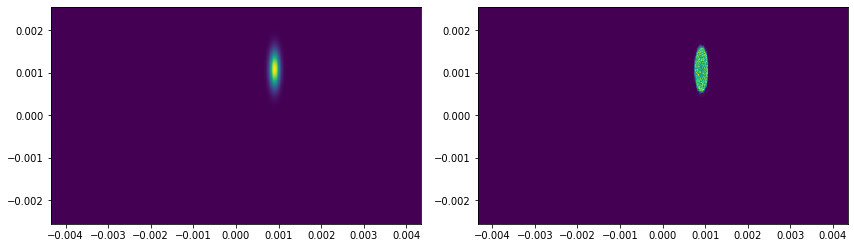

In [6]:
plt.figure(figsize=(12,4))

result1 = segment(beam1)
print(result1)
plt.subplot(121)
plt.imshow(segment.AREABSCR1.reading, interpolation="None", extent=segment.AREABSCR1.extent)

result2 = segment(beam2)
print(result2)
plt.subplot(122)
plt.imshow(segment.AREABSCR1.reading, interpolation="None", extent=segment.AREABSCR1.extent)

plt.tight_layout()
plt.show()

In [8]:
segment.AREABSCR1.misalignment = (0.002, 0)

ParameterBeam(mu_x=-0.001100, mu_xp=0.002000, mu_y=0.001069, mu_yp=0.001136, sigma_x=0.000081, sigma_xp=0.000078, sigma_y=0.000278, sigma_yp=0.000098, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)
ParticleBeam(n=100000, mu_x=-0.001100, mu_xp=0.002000, mu_y=0.001069, mu_yp=0.001136, sigma_x=0.000081, sigma_xp=0.000078, sigma_y=0.000278, sigma_yp=0.000098, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)


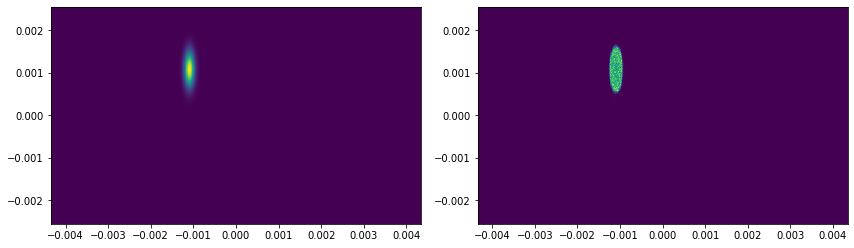

In [9]:
plt.figure(figsize=(12,4))

result1 = segment(beam1)
print(segment.AREABSCR1.read_beam)
plt.subplot(121)
plt.imshow(segment.AREABSCR1.reading, interpolation="None", extent=segment.AREABSCR1.extent)

result2 = segment(beam2)
print(segment.AREABSCR1.read_beam)
plt.subplot(122)
plt.imshow(segment.AREABSCR1.reading, interpolation="None", extent=segment.AREABSCR1.extent)

plt.tight_layout()
plt.show()